# Fake News Detection/Prediction

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import re
import numpy as np
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jashpaleja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [168]:
df = pd.read_csv('news_dataset.csv')

### Drop Null values 
### Change textual values to numerical ('Real', 'Fake')

In [169]:
df.dropna()
df.reset_index(drop=False)
df['label'] = df['label'].replace({'REAL': 1, 'FAKE': 0})

#### Remove special characters and puntuations

In [170]:

df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
df['text'] = df['text'].apply(lambda x: x.lower())
df.head()

,label,text
0,1,payal has accused filmmaker anurag kashyap of ...
1,0,a fourminutelong video of a woman criticising ...
2,0,republic poll a fake twitter account imitating...
3,1,delhi teen finds place on un green list turns ...
4,1,delhi a highlevel meeting underway at residenc...


#### Remove stop words

In [171]:
commonly_used_words = stopwords.words('english')

def removeWords(sentence: str):
    setenceArr = sentence.split(' ')
    filtered = [x for x in setenceArr if x not in commonly_used_words]
    return ' '.join(filtered)

df['text'] = df['text'].apply(lambda x: removeWords(x))
df.head()

,label,text
0,1,payal accused filmmaker anurag kashyap behavin...
1,0,fourminutelong video woman criticising governm...
2,0,republic poll fake twitter account imitating a...
3,1,delhi teen finds place un green list turns gla...
4,1,delhi highlevel meeting underway residence raj...


## Word Cloud
The concept of identifying the most frequently occurring words in a given dataset can be described as finding the words that appear with the highest frequency. By visualizing the data, we can emphasize the prominence of these words by making them bolder and bigger in the displayed text. This helps to convey their significance based on their frequency within the string.

#### Fake News Cloud

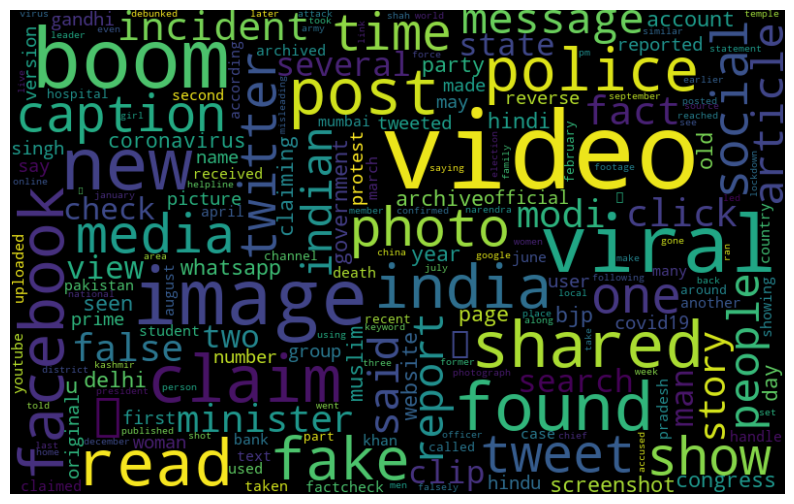

In [172]:


fake_data = df[df["label"] == 0]

all_words = ' '.join([str(text).replace('\n', ' ') for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110,collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Real News Cloud

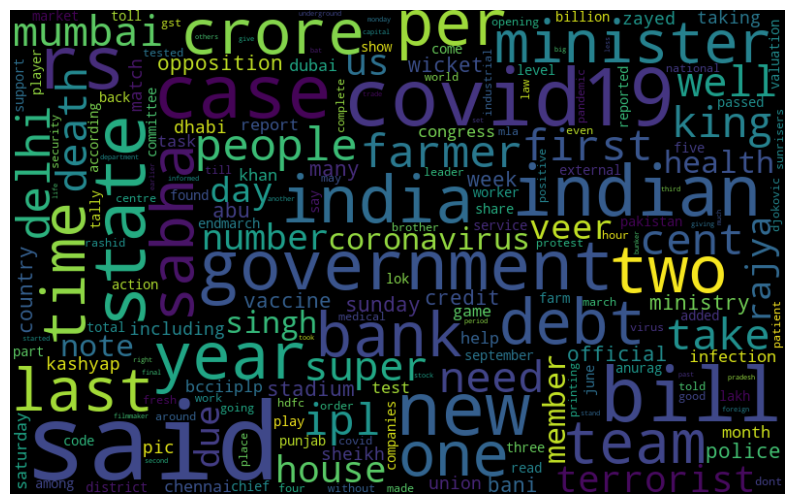

In [173]:

true_data = df[df["label"] == 1]

all_words = ' '.join([str(text).replace('\n', ' ') for text in true_data.text])

wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110,collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentimental Analysis of Data
The sentiment polarity score represents the sentiment or emotional tone of the text on a numeric scale. It ranges from -1 to 1, where -1 indicates highly negative sentiment, 1 indicates highly positive sentiment, and 0 represents a neutral sentiment.

In [174]:
def sentimentGraph(data, type: str):
    dataFrame = data.copy()
    dataFrame['sentiment'] = dataFrame['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    sentiment_counts = dataFrame['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')).value_counts()
    plt.figure(figsize=(4,4))
    plt.bar(sentiment_counts.index, sentiment_counts.values)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title(f'{type} Sentiment Distribution')
    plt.show()

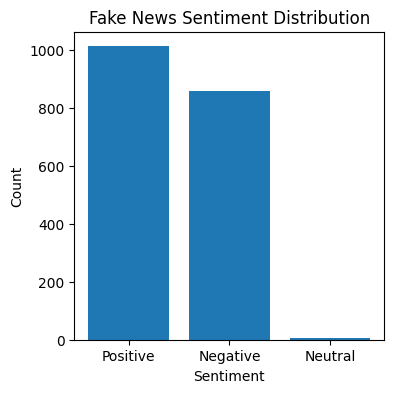

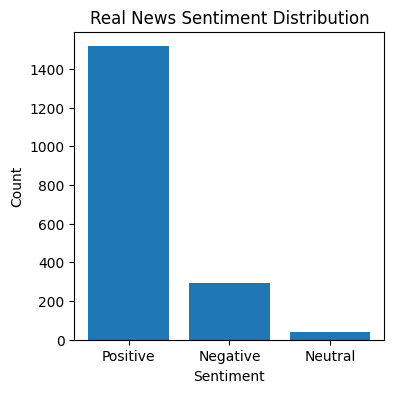

In [175]:
sentimentGraph(fake_data, 'Fake News')
sentimentGraph(true_data, 'Real News')

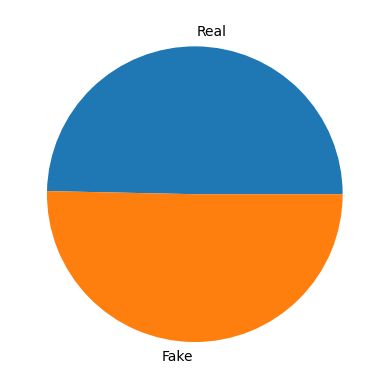

In [176]:
mix = [true_data.shape[0],fake_data.shape[0]]
plt.pie(mix, labels=['Real', 'Fake'])
plt.show()

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df['text'].head()

0    payal accused filmmaker anurag kashyap behavin...
1    fourminutelong video woman criticising governm...
2    republic poll fake twitter account imitating a...
3    delhi teen finds place un green list turns gla...
4    delhi highlevel meeting underway residence raj...
Name: text, dtype: object

In [178]:
train, test  = train_test_split(df, test_size=0.2)

In [179]:
X_train, Y_train = train['text'], train['label']
X_train = X_train.apply(lambda x: x.replace('\n', ' '))
X_train = vectorizer.fit_transform(X_train.values.astype('U'))


In [180]:
XTest, YTest = train['text'], train['label']
XTest = vectorizer.transform(XTest.values.astype('U'))

In [183]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)
o = logisticRegr.predict(XTest)
p = YTest.values
round(balanced_accuracy_score(o,p),5)

0.99833